# pyplot对象学习

pyplot对象包含了一系列用于绘图的函数，使得它工作起来就像MATLIB一样。它的功能例如：
+ 创建一个figure对象
+ 绘制一片绘图区域
+ 在区域中绘制线条或者点
+ 也可以绘制labels

#### 使用pyplot对象快速的生成一幅图片


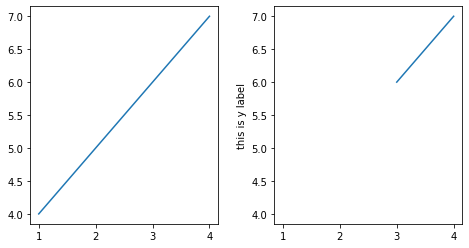

In [145]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot([1,2,3,4],[4,5,6,7])
plt.subplot(122)
plt.plot([1,2,3,4],[4,None,6,7]) ##看有一段为空了
plt.ylabel("this is y label")
plt.subplots_adjust(right=1,left=0,wspace=0.3) ##调整一下两幅图的间隔
plt.show() ## 显示图片

`pyplot.plot()`函数也可以只提供一个一维数组,这时候函数会将数组作为y轴，而x轴的坐标则是从0开始出发,获取与y轴相同个数的点


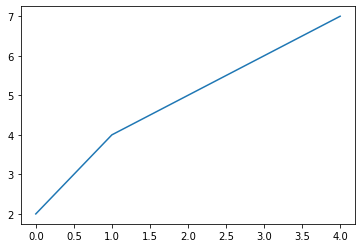

In [14]:
plt.plot([2,4,5,6,7])

#### 同时还可以自定义一个样式，例如
+ 修改线条的类型，
+ 线条的颜色，
+ 坐标轴的范围等


(0.0, 5.0, 0.0, 3.0)

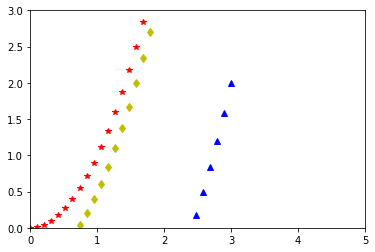

In [25]:
import numpy as np
x=np.linspace(0,2,20)
y=x*x
plt.plot(x,y,'r*') # ro 意思是红色的点 r-- 红色的虚线
plt.plot(x+1,y-2,'b^')
plt.plot(x,y-0.5,'yd')
plt.axis([0,5,0,3]) #x轴和y轴范围

#### 绘制散点图
pyplot根据data关键字来获取对应的绘图数据
+ `'a'`表示从data中获取作为X轴
+ `'b'`表示作物y轴的数据
+ `c='c'`表示映射为对应的颜色
+ `s='s'` 大小的映射

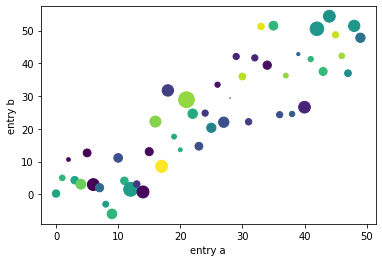

In [38]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a','b',c='c',s='d',data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

#### 绘制分类图
+ `subplot`函数中包含3个参数，其中前两个参数用于将图片按照行和列进行均等分，而第三个参数则是表示显示在哪个分好的格子中



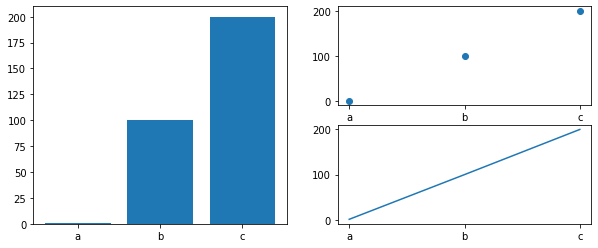

In [1]:
import matplotlib.pyplot as plt
name=['a','b','c']
values=[1,100,200]
plt.figure(figsize=(10,4))
plt.subplot(1,2,1) ##将figure均等分为2份
plt.bar(name,values)
plt.subplot(2,2,2) ##分4份
plt.scatter(name,values)
plt.subplot(2,2,4) ##分4份
plt.plot(name,values)


#### 控制线条显示
+ 可以直接在plot对象中对线条进行设置
+ 也可以获取plot返回后的对象，调用plt的setp函数对对象进行操作

[None, None, None]

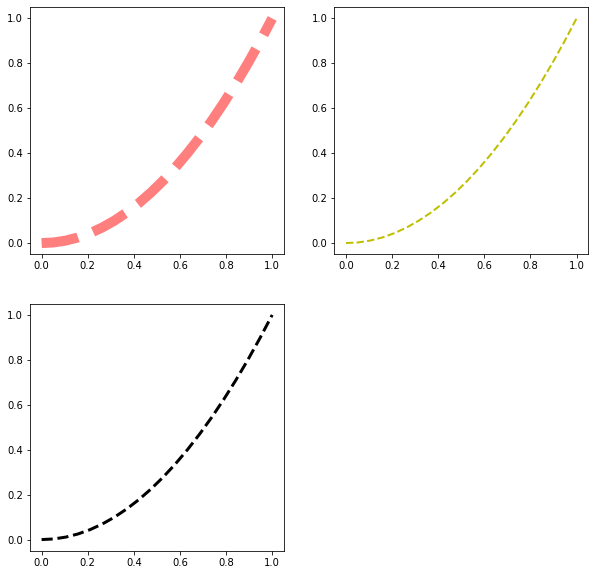

In [88]:
import numpy as np
x=np.linspace(0,1,20)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
lines=plt.plot(x,x*x,'--') ##获取lines对象
plt.setp(lines,color="r",linewidth=10.0,alpha=0.5)  ##调用方法对对象进行操作
plt.subplot(2,2,2)
lines2=plt.plot(x,x*x,'--') ##获取lines对象
plt.setp(lines2,color='y',linewidth=2)
plt.subplot(2,2,3)
lines3=plt.plot(x,x*x,'--') ##获取lines对象
plt.setp(lines3,color='black',linewidth=3,animated=True)

#### 添加文字描述
 `plt.text`函数可以在图中指定位置添加文字注释
 + 第一个参数是x轴位置新
 + 第二个参数是y轴位置新
 + 第三个参数则是添加的文字，可以使用正则表达式，并且空格也需要转义
 
`plt.annotate`函数则更加的方便，可以添加箭头信息等
+ `arrowprops`字典中arrowstyle可以指定箭头类型



Text(0.012, 140, '$Code,\\ Hub$')

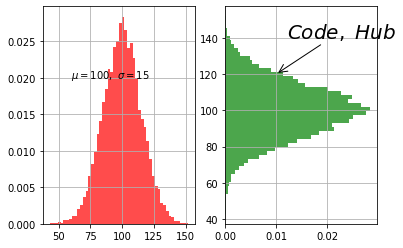

In [154]:
mu,sigma=100,15
x=mu+sigma*np.random.randn(10000)
plt.figure()
plt.subplot(121)
n,bins,patches=plt.hist(x,50,density=1,color='r',alpha=0.7)
plt.text(60,0.02,r'$\mu=100,\ \sigma=15$') ##添加文字，特效符合需要转义
plt.grid(True)
plt.subplot(122)
n,bins,patches=plt.hist(x,50,density=1,color='g',alpha=0.7,orientation='horizontal') ##水平放置
plt.grid(True)
plt.annotate(r'$Code,\ Hub$',
             size=20,
             xy=(0.01,120),
             xytext=(0.012,140),
             arrowprops=dict(facecolor='blue',arrowstyle='->')) ##添加箭头注释信息

#### 坐标轴对数化


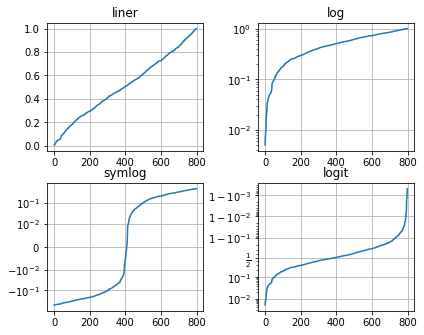

In [140]:
##用于绘制相应对数化后的刻度线
from matplotlib.ticker import NullFormatter
###获取数据
np.random.seed(19680801)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y)) ##生成步长为1的指定数目的array
plt.figure()
plt.subplot(2,2,1)

## 线性坐标轴
plt.plot(x,y)
plt.title("liner")
plt.grid(True)

##对数坐标轴
plt.subplot(222)
plt.plot(x,y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

##对称,log坐标轴
plt.subplot(223)
plt.plot(x,y-y.mean())
plt.yscale('symlog',linthreshy=0.01)
plt.title('symlog')
plt.grid()

##logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
plt.subplots_adjust(top=1, bottom=0, left=0.10, 
                    right=0.95, 
                    hspace=0.25,
                    wspace=0.35 )##调整子图间的间隔